#### **Exercise 1:**

The `titanic` dataset is widely used in ML courses.  The 'stakeholder problem' is to predict whether or not a person was likely to survive given the available data.  We'll use it here for a few problems to get used to pre-processing. First, let's do some EDA.  Load the data in and use a scatter plot matrix to visualize just the numeric columns.  Look critically at your results.  What have you learned?  What would you like to know that this analysis doesn't tell you?

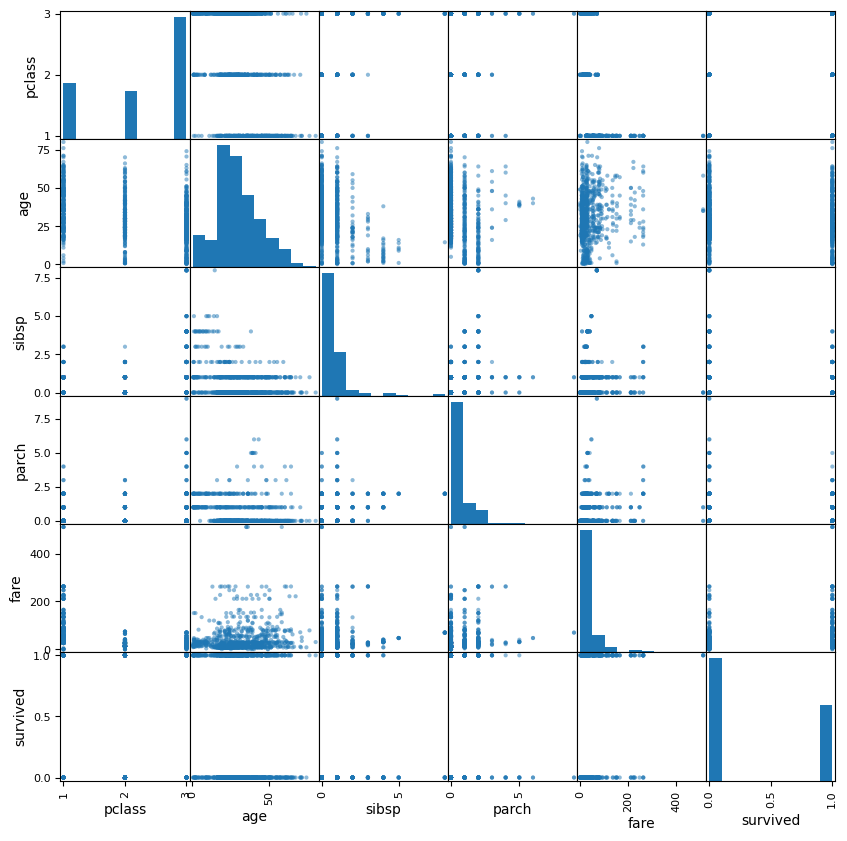

In [41]:
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv("data/titanic.csv")
pd.plotting.scatter_matrix(data, figsize = (10,10)) # automatically only plots numerics
plt.show()

#### **Exercise 2:**

It's zero cost to build a scatter matrix, but sometimes it only helps to highlight what you *don't* know. In addition to identifying correlations (or lack thereof) we'd also like to get a sense of the predictive power of different features.  Figure out how to use histogram plots to look at survival rates by age, pclass, and gender.

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

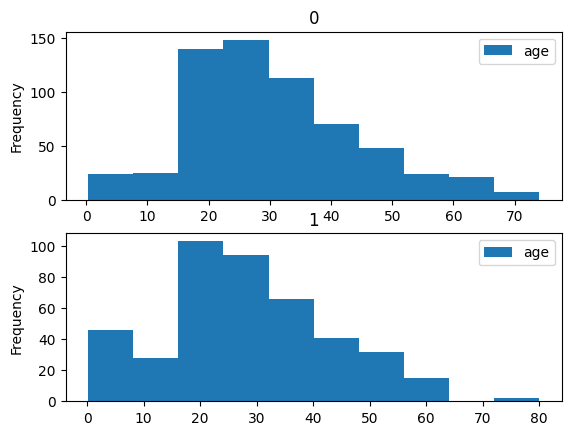

In [42]:
data[['age','survived']].plot.hist(by="survived")

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

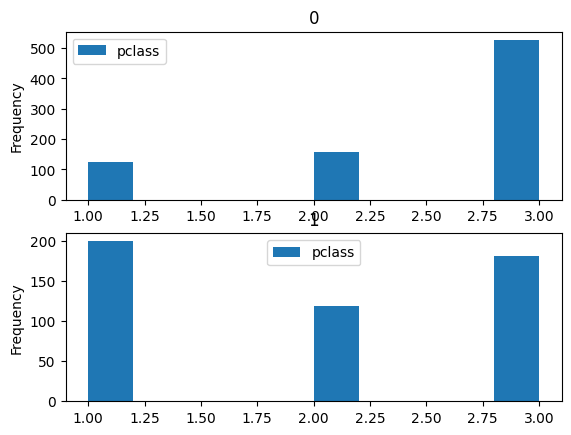

In [43]:
data[['pclass','survived']].plot.hist(by="survived")

array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

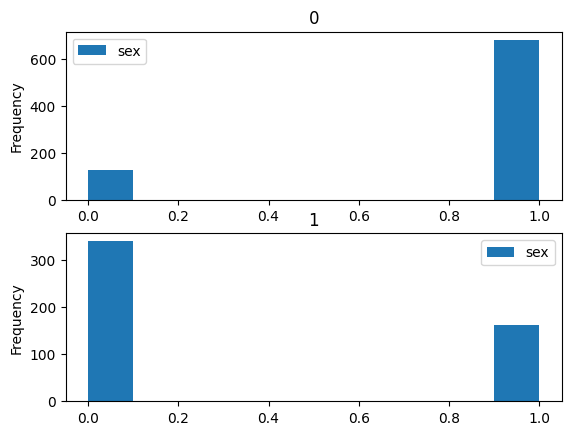

In [44]:
# encode sex as num
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.head()
label = le.fit_transform(data['sex'])

data.drop('sex', axis=1, inplace=True)
data['sex'] = label

data[['sex','survived']].plot.hist(by="survived")

#### **Exercise 3:**

Examine your data for NAs.  For the features that you think are likely to matter given your initial analysis, use an imputer to fill in the missing values. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.

In [45]:
data.isna().sum()

pclass         0
name           0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
sex            0
dtype: int64

In [46]:
data['age'].fillna(data['age'].mean(), inplace=True)

#### **Exercise 4**

Recall that sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

In [47]:
data.dtypes

pclass        int64
name         object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
survived      int64
sex           int64
dtype: object

In [49]:
datacleaned = data.drop(columns=['name','ticket','fare','cabin','embarked'])
datacleaned.head()

,pclass,age,sibsp,parch,survived,sex
0,1,29.0000,0,0,1,0
1,1,0.9167,1,2,1,1
2,1,2.0000,1,2,0,0
3,1,30.0000,1,2,0,1
4,1,25.0000,1,2,0,0


#### **Exercise 5**

Using 5-fold cross-validation, compare the performance of a LogisticRegression classifier with that of a DecisionTree classifier.

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

features = datacleaned.drop(columns=['survived'])
X, y = features, datacleaned['survived']

# Initialize classifiers
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()

# Perform 5-fold cross-validation
log_reg_scores = cross_val_score(log_reg, X, y, cv=5)
decision_tree_scores = cross_val_score(decision_tree, X, y, cv=5)

# Calculate and print the average accuracy
log_reg_accuracy = log_reg_scores.mean()
decision_tree_accuracy = decision_tree_scores.mean()

print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Decision Tree Accuracy: {decision_tree_accuracy}")

Logistic Regression Accuracy: 0.7104354947208329
Decision Tree Accuracy: 0.6378988622736977


_Note, the following exercises use the housing data introduced in this week's lecture notes._

#### **Exercise 6:** 

Using the housing data introduced with the end-to-end example this week, try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the [documentation](https://scikit-learn.org/stable/modules/svm.html) if you are interested). Use GridSearchCV to explore the parameter space. How does the best `SVR` predictor perform?

#### **Exercise 7:**

Try replacing the `GridSearchCV` with a `RandomizedSearchCV`.

#### **Exercise 8:**

Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes.  Use a `RandomForestRegressor` to drive the feature selection process.